In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

from scipy.special import erf

from matplotlib import animation, rc
from IPython.display import HTML

In [48]:
dx = 2000
dt = 2400
L = 10
tf = 20
k = 0.4

x = np.linspace(-L, L-0.15623, dx)
t = np.linspace(0.01, tf, dt)

xv, tv = np.meshgrid(x, t)
T = np.exp(-xv**2/(4*k*tv))/(np.sqrt(4*np.pi*k*tv))

#T[0,0] = Ti

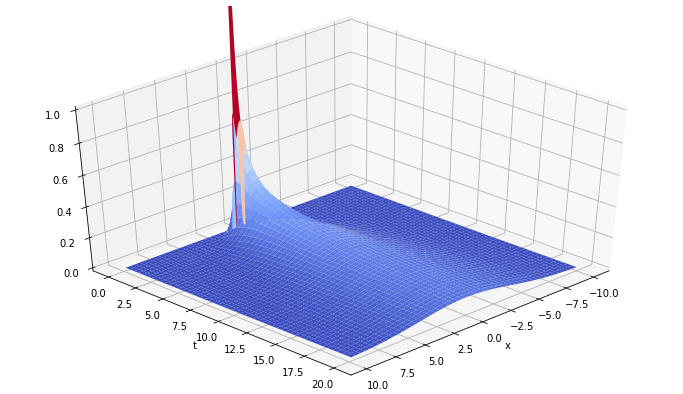

In [49]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xv, tv, T, cmap=cm.coolwarm)

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlim([0, 1])
ax.view_init(elev=40, azim=45)

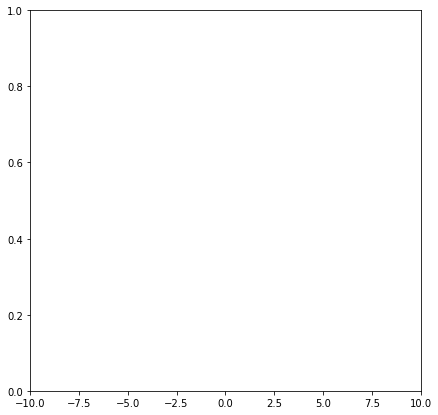

In [50]:
fig, ax = plt.subplots(figsize = (7, 7))
ax.set_xlim((-10, 10))
ax.set_ylim((0, 1))


line, = ax.plot([], [], lw=2)


def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    Tn = T[i, :]
    line.set_data(x, Tn)
    
    return (line,)

In [52]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=400, interval=20, blit=True)
HTML(anim.to_html5_video())

In [53]:
from scipy.special import jv, yv

In [147]:
#Fo = 1

def integral1(lam, R, Fo):
    dlam = lam[1] - lam[0]
    lamv, Rv, Fov = np.meshgrid(lam, R, Fo)
    
    num = jv(0, lamv*Rv)*jv(1, lamv)
    denom = jv(1, lamv)*yv(0, lamv) - jv(0, lamv)*yv(1, lamv)
    
    integrand =  2*np.exp(-lamv**2*Fov)*num/denom/lamv/np.pi
    return np.sum(integrand*dlam, axis=1)


def integral2(lam, R, Fo):
    
    dlam = lam[1] - lam[0]
    lamv, Rv, Fov = np.meshgrid(lam, R, Fo)
    
    num = jv(0, lamv*Rv)*jv(1, lamv)
    denom = (jv(1, lamv)*yv(0, lamv) - jv(0, lamv)*yv(1, lamv))**2
    integrand = 4*np.exp(-lamv**2*Fov)*num/denom/(np.pi**2*lamv**2)
    
    return np.sum(integrand*dlam, axis=1)

In [148]:
lam = np.linspace(0.0000000001, 20, 501)
Fo = np.linspace(0.0001, 10, 153)
dlam = lam[1] - lam[0]
#integral1(lam)

R = np.linspace(0, 4, 102)
R1 = R*(R > 1)
R2 = R*(R < 1)

T1 = integral1(lam, R1, Fo)
T2 = integral2(lam, R2, Fo)
T = 0*R

# T[R > 1] = T1
# T[R < 1] = T2

In [149]:
Rv, Fov = np.meshgrid(Fo, R)
T = 0*Rv
T = T1*(Rv > 1) + T2*(Rv < 1)

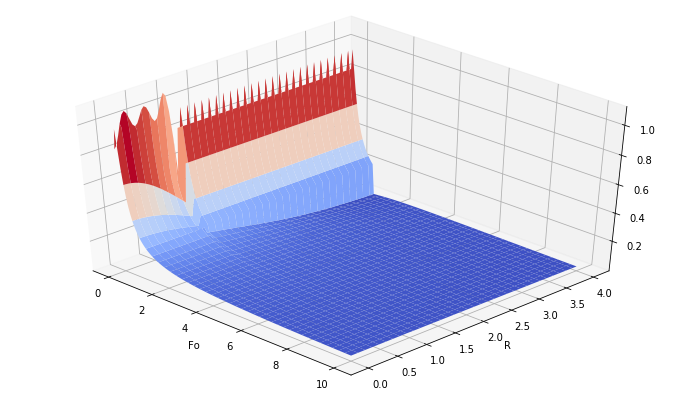

In [150]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Rv, Fov, T, cmap=cm.coolwarm)

ax.set_xlabel('Fo')
ax.set_ylabel('R')
#ax.set_zlim([0, 1])
ax.view_init(elev=40, azim=-45)

In [136]:
integral2(lam, 0.0000001, 0.0000001)

array([[1.24748151]])

In [115]:
T1.shape

(181, 153)

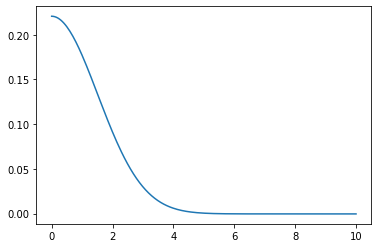

In [104]:
fig, ax = plt.subplots(figsize=(6,4))

ax.plot(R, T)

In [90]:
integral1(lam, 13)

-4.16847243905069e-06

In [102]:
R.shape

(202,)

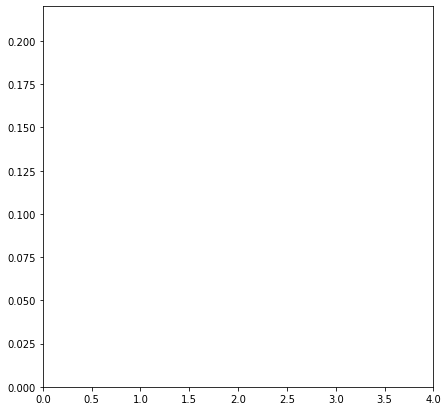

In [157]:
fig, ax = plt.subplots(figsize = (7, 7))
ax.set_xlim((0, 4))
ax.set_ylim((0, 0.22))


line, = ax.plot([], [], lw=2)


def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    Tn = T[:, i]
    line.set_data(R, Tn)
    
    return (line,)

In [158]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=150, interval=30, blit=True)
HTML(anim.to_html5_video())